# Accuracy test

Figure 8 of the Kang et al. (2020) is generated using this notebook. 
To run the simulation, you need to run `accuarcy.py` in `python_scripts` folder.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob, os
os.chdir("./accuracy/")
datas = []
for file in np.sort(glob.glob("data*")):
    datas.append(np.load(file))
x = np.load("xyz.npy")
import matplotlib
matplotlib.rcParams['font.size'] = 14

In [2]:
pico = 1e-12
area = 536.36
moment = pico * area

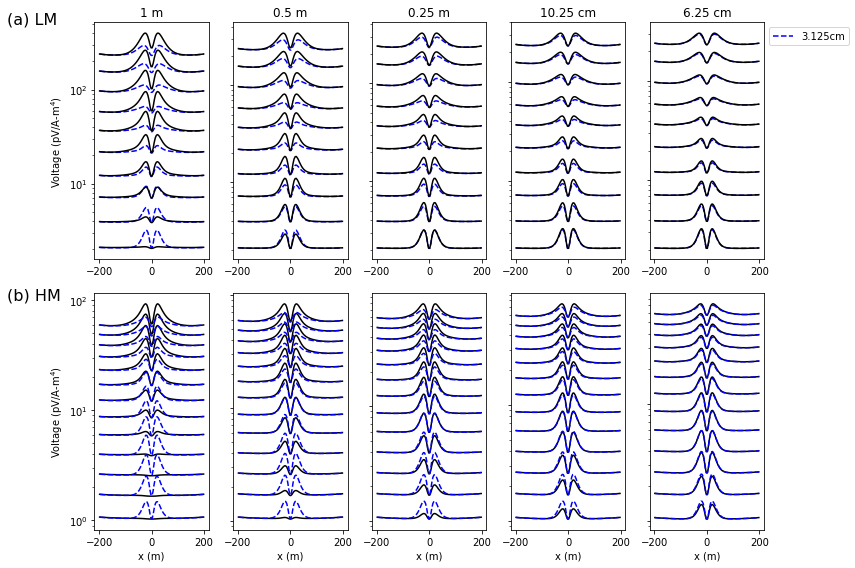

In [3]:
cs_labels = ['1 m', '0.5 m', '0.25 m', '10.25 cm', '6.25 cm', '3.12 5cm']
fig, axs = plt.subplots(2,5, figsize=(12, 8))
data_hm_fine = datas[-1][:100*30].reshape((30, 100), order='F').T[:, 8:-9]
data_lm_fine = datas[-1][100*30:].reshape((20, 100), order='F').T[:, 8:-2]  

for ii in range(5):
    data = datas[ii]
    data_hm = data[:100*30].reshape((30, 100), order='F').T[:, 8:-9]
    data_lm = data[100*30:].reshape((20, 100), order='F').T[:, 8:-2]
    out = axs[0,ii].semilogy(x[:,0], -data_lm_fine/moment, 'b--', ms=3)
    if ii==4:
        axs[0, ii].legend(("3.125cm", ), bbox_to_anchor=(1,1))        
    out = axs[0,ii].semilogy(x[:,0], -data_lm/moment, 'k-', ms=3)            
    out = axs[1,ii].semilogy(x[:,0], -data_hm/moment, 'k-', ms=3)    
    out = axs[1,ii].semilogy(x[:,0], -data_hm_fine/moment, 'b--', ms=3)    
    if ii > 0:
        axs[0,ii].set_yticklabels([])
        axs[1,ii].set_yticklabels([])        
    else:
        axs[0,ii].text(-550, 5e2, "(a) LM", fontsize=16)
        axs[1,ii].text(-550, 1e2, "(b) HM", fontsize=16)        
    axs[0,ii].set_title(cs_labels[ii])
    axs[1,ii].set_xlabel("x (m)")
#     axs[0,ii].set_ylim(10, 1e4)
#     axs[1,ii].set_ylim(0.1, 4e2)    

axs[0, 0].set_ylabel("Voltage (pV/A-m$^4$)")
axs[1, 0].set_ylabel("Voltage (pV/A-m$^4$)")
plt.tight_layout()
fig.savefig('../figures/figure-8', dpi=200)